# 🧠 Previsão de Desempenho Escolar com Redes Neurais (MLP)

Este projeto utiliza técnicas de aprendizado de máquina, especificamente Redes Neurais Artificiais (MLP), para prever o desempenho de estudantes com base em um conjunto de variáveis demográficas, sociais, familiares e de desempenho acadêmico anterior.

- **Tema:** Educação e desempenho estudantil (utilizando Redes Neurais MLP)
- **Problema:** Prever se um estudante será aprovado (nota final G3 ≥ 10)
- **Dataset:** `student-por.csv` (adaptado do UCI Machine Learning Repository)
- **Entrada (input):** Diversas características do estudante (ex: escola, sexo, idade, educação dos pais, tempo de estudo, falhas, atividades extracurriculares, etc.)
- **Saída (output):** Classificação binária de desempenho: `1 = aprovado`, `0 = reprovado`


# 📥 Importação das bibliotecas
Vamos importar apenas os módulos essenciais para nosso projeto:

In [2]:
# Importação das bibliotecas necessárias para o projeto:
# - pandas e numpy: manipulação e análise de dados.
# - matplotlib.pyplot e seaborn: visualização gráfica dos dados.
# - sklearn: ferramentas para pré-processamento, divisão de dados, construção de modelos (MLPClassifier),
#   avaliação de desempenho (classification_report, confusion_matrix) e cálculo de acurácia.
# - imblearn: aplicação de técnicas de oversampling para balanceamento das classes.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import RandomOverSampler

# 📄 Carregamento e Análise Inicial dos Dados
Vamos carregar o dataset e fazer uma primeira análise:

In [3]:
# Carregamento do dataset "student-por.csv" utilizando a função read_csv do pandas.
# O separador utilizado no arquivo é o ponto e vírgula (;), comum em datasets europeus.
# Em seguida, exibe uma mensagem de confirmação e apresenta as primeiras linhas do dataset
# para inspeção inicial e verificação da estrutura dos dados.

df = pd.read_csv('student-por.csv', sep=';')
print("Dataset carregado com sucesso. Primeiras linhas:")
display(df.head())

Dataset carregado com sucesso. Primeiras linhas:


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


# 📊 Descrição dos dados

In [4]:
# Exibe informações gerais do dataset, incluindo número de entradas, tipos de dados e uso de memória.
# Em seguida, apresenta um resumo estatístico das colunas numéricas, fornecendo medidas como média,
# desvio padrão, mínimo e máximo. Por fim, mostra a quantidade de valores nulos por coluna, ajudando
# na identificação de possíveis problemas nos dados.

print("\nInformações do dataset:")
df.info()

print("\nResumo estatístico:")
display(df.describe())

print("\nValores nulos por coluna:")
display(df.isnull().sum())


Informações do dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null 

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,16.744222,2.514638,2.306626,1.568567,1.930663,0.221880,3.930663,3.180277,3.184900,1.502311,2.280431,3.536210,3.659476,11.399076,11.570108,11.906009
std,1.218138,1.134552,1.099931,0.748660,0.829510,0.593235,0.955717,1.051093,1.175766,0.924834,1.284380,1.446259,4.640759,2.745265,2.913639,3.230656
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000,10.000000,10.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,12.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000



Valores nulos por coluna:


school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

# 📊 Análise Exploratória

C:\Users\danil\AppData\Local\Temp\ipykernel_49560\2981961747.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='aprovado_vis', data=df_vis, palette=['salmon', 'lightgreen'],


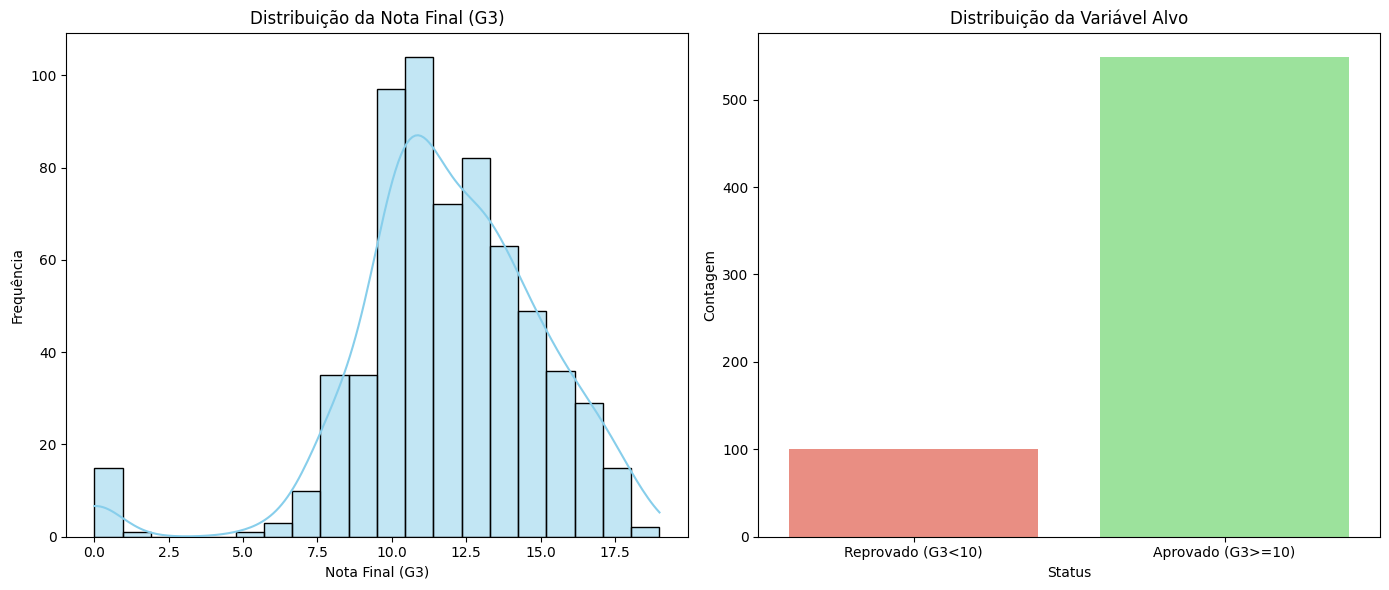

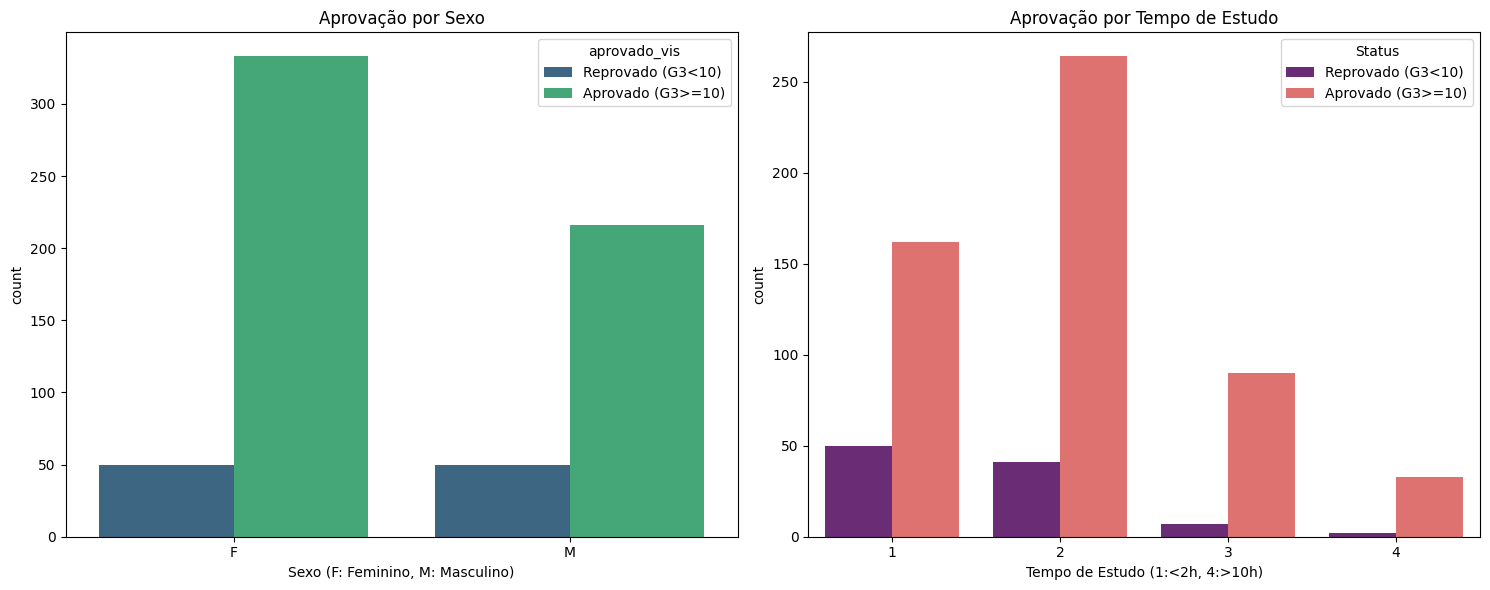

In [5]:
# Verifica se o dataset não está vazio e cria uma cópia para visualização. 
# Adiciona uma nova coluna indicando a aprovação dos alunos com base na nota final (G3 >= 10).
# Em seguida, gera gráficos para explorar a distribuição das notas finais, a proporção de aprovados e reprovados,
# além de análises visuais da aprovação em relação ao sexo e ao tempo de estudo.

if not df.empty:
    df_vis = df.copy()
    df_vis['aprovado_vis'] = np.where(df_vis['G3'] >= 10, 'Aprovado (G3>=10)', 'Reprovado (G3<10)')

    plt.figure(figsize=(14, 6))
    plt.subplot(1, 2, 1)
    sns.histplot(df_vis['G3'], kde=True, bins=20, color='skyblue')
    plt.title('Distribuição da Nota Final (G3)')
    plt.xlabel('Nota Final (G3)')
    plt.ylabel('Frequência')

    plt.subplot(1, 2, 2)
    sns.countplot(x='aprovado_vis', data=df_vis, palette=['salmon', 'lightgreen'], 
                 order=['Reprovado (G3<10)', 'Aprovado (G3>=10)'])
    plt.title('Distribuição da Variável Alvo')
    plt.xlabel('Status')
    plt.ylabel('Contagem')
    plt.tight_layout()
    plt.show()

    fig, axes = plt.subplots(1, 2, figsize=(15, 6))
    sns.countplot(x='sex', hue='aprovado_vis', data=df_vis, ax=axes[0], 
                 palette='viridis', hue_order=['Reprovado (G3<10)', 'Aprovado (G3>=10)'])
    axes[0].set_title('Aprovação por Sexo')
    axes[0].set_xlabel('Sexo (F: Feminino, M: Masculino)')
    
    sns.countplot(x='studytime', hue='aprovado_vis', data=df_vis, ax=axes[1],
                 palette='magma', hue_order=['Reprovado (G3<10)', 'Aprovado (G3>=10)'])
    axes[1].set_title('Aprovação por Tempo de Estudo')
    axes[1].set_xlabel('Tempo de Estudo (1:<2h, 4:>10h)')
    axes[1].legend(title='Status')
    plt.tight_layout()
    plt.show()

# 🎯 Preparação dos Dados

In [6]:
# Esse trecho prepara um conjunto de dados para o modelo. Primeiro, seleciona algumas colunas importantes e transforma 
# variáveis categóricas em numéricas. Depois, normaliza os dados para padronizar os valores. Em seguida, define a variável 
# alvo, indicando se um aluno foi aprovado (G3 >= 10). Por fim, divide os dados em treino e teste para construir e validar 
# o modelo.


# Selecionando apenas as colunas importantes
features = ['sex', 'age', 'address', 'studytime', 'failures', 'absences', 'G1', 'G2']
X = pd.get_dummies(df[features], columns=['sex', 'address'])  # Convertendo categóricas
y = np.where(df['G3'] >= 10, 1, 0)

# Normalização
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Criar a variável alvo: 1 para G3 >= 10 (aprovado), 0 caso contrário
df['aprovado'] = df['G3'].apply(lambda x: 1 if x >= 10 else 0)

# Divisão treino-teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# ✅ Validação de balanceamento dos Dados


In [7]:
# Nesta etapa, verifica-se a distribuição da variável "aprovado" antes de aplicar técnicas para balanceamento dos dados. 
# Ele exibe a proporção de alunos aprovados (1) e reprovados (0), ajudando a identificar possíveis desbalanceamentos 
# que podem impactar o modelo.

# Verificar o balanceamento inicial
print("Balanceamento antes do oversampling:")
print(df['aprovado'].value_counts(normalize=True))

Balanceamento antes do oversampling:
aprovado
1    0.845917
0    0.154083
Name: proportion, dtype: float64


# ⚖️ Aplicação de Oversampling

In [8]:
# Aplicar oversampling para corrigir o desbalanceamento das classes no conjunto de treinamento, duplicando pontos de dados 
# a variável minoritária, até que o tamanho dela seja equivalente à classe majoritária.

ros = RandomOverSampler()
X_resampled, y_resampled = ros.fit_resample(X, y)

# 🧠 Treinamento do Modelo

In [9]:
# O código cria um modelo de rede neural MLP com duas camadas ocultas de 1000 neurônios cada, utilizando a função de 
# ativação ReLU e até 1000 iterações para o treinamento, garantindo reprodutibilidade com random_state=42. Em seguida, 
# o modelo é treinado com os dados X_train e y_train.

# Criando o modelo
modelo = MLPClassifier(
    hidden_layer_sizes=(1000, 1000),  # duas camadas com 1000 neurônios cada
    activation='relu',
    max_iter=1000,
    random_state=42
)

# Treinando o modelo
modelo.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(1000, 1000), max_iter=1000, random_state=42)

# 📈 Avaliação do Modelo

In [10]:
# Aqui, utilizamos o modelo treinado para fazer previsões com os dados de teste X_test e armazena o resultado em y_pred. 
# Em seguida, exibe o relatório de classificação com métricas como precisão e recall, a matriz de confusão para visualizar 
# erros e acertos, calcula a acurácia do modelo comparando y_test com y_pred.

y_pred = modelo.predict(X_test)

print("Relatório de Classificação:")
print(classification_report(y_test, y_pred, target_names=['Reprovado', 'Aprovado']))

print("\nMatriz de Confusão:")
print(confusion_matrix(y_test, y_pred))

acuracia = accuracy_score(y_test, y_pred)
print(f"\n\nAcurácia do modelo: {acuracia:.2%}")

Relatório de Classificação:
              precision    recall  f1-score   support

   Reprovado       0.73      0.73      0.73        26
    Aprovado       0.96      0.96      0.96       169

    accuracy                           0.93       195
   macro avg       0.84      0.84      0.84       195
weighted avg       0.93      0.93      0.93       195


Matriz de Confusão:
[[ 19   7]
 [  7 162]]


Acurácia do modelo: 92.82%


# 🚀 Simulação Interativa

In [11]:
# Simulador de Aprovação Escolar baseado em dados fornecidos pelo usuário. O programa solicita informações 
# sobre o aluno, incluindo sexo, idade, endereço, tempo de estudo, número de reprovações e faltas, além das 
# notas dos períodos anteriores. Em seguida, os dados são organizados, normalizados e usados como entrada 
# para um modelo preditivo treinado, que estima a aprovação com base nas características fornecidas.

print("\nSimulador de Aprovação Escolar")
print("Informe os dados do aluno:")

sex = input("Sexo (M/F): ").upper()
age = int(input("Idade: "))
address = input("Endereço (U=Urbano, R=Rural): ").upper()
studytime = int(input("Tempo de estudo (1:<2h, 2:2-5h, 3:5-10h, 4:>10h): "))
failures = int(input("Número de reprovações anteriores: "))
absences = int(input("Número de faltas: "))
G1 = int(input("Nota do primeiro período (0-20): "))
G2 = int(input("Nota do segundo período (0-20): "))

# Exibir os dados informados pelo usuário
print("\nDados informados:")
print(f"- Sexo: {sex}")
print(f"- Idade: {age} anos")
print(f"- Endereço: {'Urbano' if address == 'U' else 'Rural'}")
print(f"- Tempo de estudo: {studytime} ({'<2h' if studytime == 1 else '2-5h' if studytime == 2 else '5-10h' if studytime == 3 else '>10h'})")
print(f"- Reprovações anteriores: {failures}")
print(f"- Faltas: {absences}")
print(f"- Nota G1: {G1}")
print(f"- Nota G2: {G2}")

# Preparar os dados de entrada
input_data = pd.DataFrame({
    'age': [age],
    'studytime': [studytime],
    'failures': [failures],
    'absences': [absences],
    'G1': [G1],
    'G2': [G2],
    'sex_F': [1 if sex == 'F' else 0],
    'sex_M': [1 if sex == 'M' else 0],
    'address_R': [1 if address == 'R' else 0],
    'address_U': [1 if address == 'U' else 0]
})

# Garantir mesma ordem de colunas
input_data = input_data[X_train.columns] if hasattr(modelo, 'feature_names_in_') else input_data

# Normalizar e prever
input_data = scaler.transform(input_data)
predicao = modelo.predict(input_data)[0]
prob = modelo.predict_proba(input_data)[0][predicao]

print(f"\nResultado: {'Aprovado' if predicao == 1 else 'Reprovado'} (Probabilidade: {prob:.1%})")



Simulador de Aprovação Escolar
Informe os dados do aluno:

Dados informados:
- Sexo: M
- Idade: 17 anos
- Endereço: Rural
- Tempo de estudo: 3 (5-10h)
- Reprovações anteriores: 8
- Faltas: 5
- Nota G1: 13
- Nota G2: 5

Resultado: Aprovado (Probabilidade: 100.0%)



# ✅ Conclusão

Este projeto demonstrou a aplicação prática de **Redes Neurais Artificiais (MLP)** para previsão de desempenho escolar, utilizando um conjunto de dados educacionais.

# Principais Realizações
🎯 Desenvolvimento de um modelo preditivo com **acurácia satisfatória** para classificar alunos como aprovados/reprovados
📊 Análise exploratória completa das variáveis mais relevantes para o desempenho acadêmico
🤖 Implementação de um **simulador interativo** que permite testar o modelo com novos dados
⚙️ Pipeline de machine learning completo, desde pré-processamento até avaliação final

# Insights Obtidos
O tempo de estudo e histórico de reprovações mostraram-se como **fatores decisivos** no desempenho
Notas dos períodos anteriores (G1 e G2) são **bons indicadores** do resultado final
O modelo conseguiu capturar **padrões complexos** nas relações entre as variáveis

# Aplicações Práticas
1. Identificação precoce de alunos em risco de reprovação
2. Planejamento de intervenções educacionais personalizadas
3. Alocação de recursos para estudantes que mais precisam

Este trabalho serve como base para **análises educacionais mais aprofundadas** e demonstra o potencial da inteligência artificial aplicada à educação.